# Prueba para joint 4 con movimiento sinusoidal incremental
## Coding
### Importando librerías


In [1]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from scipy.signal import butter, lfilter, freqz
from numpy.linalg import inv
from numpy import matmul as mx

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Plotting data

### Muestra de data para una ventana de 3000 datos

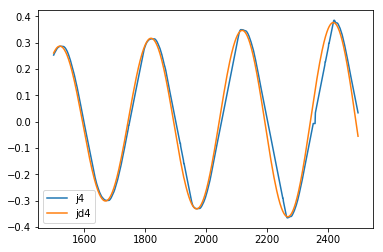

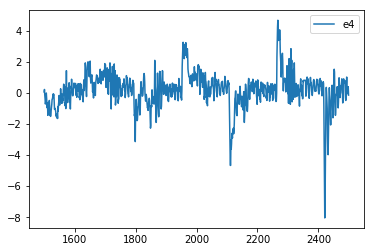

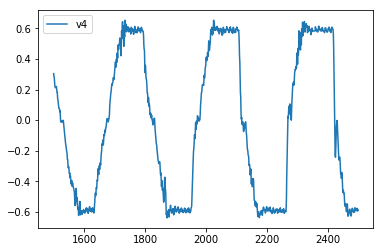

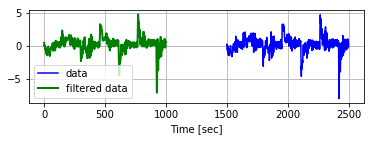

In [14]:
df = pd.read_csv('test_incrementalsin_joint4.csv')
#df_eval = pd.read_csv('evaluation_data.csv')
df_val = pd.read_csv('validation_data_6.csv')
fig1 = plt.figure()
df.j4[1500:2500].plot()
df.jd4[1500:2500].plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e4[1500:2500].plot(); plt.legend(loc='best')
fig3 = plt.figure(); df.v4[1500:2500].plot(); plt.legend(loc='best')

fig4 = plt.figure()
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 100      # sample rate, Hz
cutoff = 15.  # desired cutoff frequency of the filter, Hz

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(df['e4'], cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(df['e4'][1500:2500], 'b-', label='data')
plt.plot(y[1500:2500], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [11]:
class states():
    def __init__(self):
        self.p = []
        self.v = []
        self.a = []
        
        self.x_k_k = np.zeros((3,1))
        self.x_k1_k = np.zeros((3,1))
        
        self.P_k_k =  np.eye(3) #np.random.randn(3,3)
        self.P_k1_k = np.eye(3) #np.random.randn(3,3)
        
        self.K = np.random.randn(3,2)
        
        self.Q = 0.0002*np.eye(3)#np.diag(np.random.randn(1,3)[0,:])#np.eye(3)
        self.R = 0.0001*np.eye(2)#np.diag(np.random.randn(1,2)[0,:])
        self.I = np.eye(3)
        
        #self.q_t = []
        #self.F = np.array([])
        #self.G = np.array([])
        #self.H = np.array([])
        
    def kalman_filter(self, pos_v, vel_v):
        # Sort data
        z = []
        for pos, vel in zip(pos_v, vel_v):
            #print pos, vel
            z.append([pos, vel])
        z = np.array(z)
        F = np.array([])
        H = np.array([])
        
        
        # Matrix model
        T_ = 0.1
        
        F = np.array([[1., T_, T_**2],[0., 1., T_],[0.,0.,1.]])
        H = np.array([[1., 0., 0.],[0., 1., 0.]])
        for z_med in z:
            #Prediction
            self.x_k1_k = mx(F,self.x_k_k)
            self.P_k1_k = mx(F, mx(self.P_k_k, np.transpose(F))) +  self.Q

            #Update
            self.x_k_k = self.x_k1_k + mx(self.K, (z_med.reshape(2,1) - mx(H, self.x_k1_k)))
            self.P_k_k = mx(mx((self.I - mx(self.K, H)), self.P_k1_k), np.transpose(self.I - mx(self.K, H))) +mx(self.K, mx(self.R, np.transpose(self.K))) 

            self.K = mx(mx(self.P_k1_k, np.transpose(H)), inv(mx(H, mx(self.P_k1_k, np.transpose(H))) + self.R))   
            self.p.append(self.x_k_k[0][0])
            self.v.append(self.x_k_k[1][0])
            self.a.append(self.x_k_k[2][0])

    
    

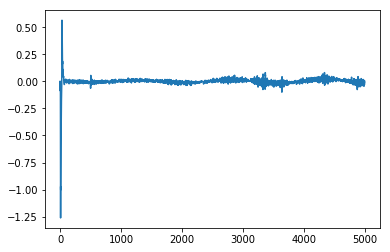

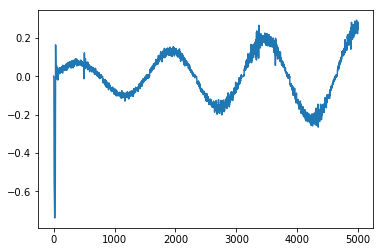

In [5]:
joint4 = states()
joint4.kalman_filter(df['j4'], df['v4'])
import matplotlib.pyplot as plt
fig02 = plt.figure(); plt.plot(joint4.a)
fig03 = plt.figure(); plt.plot(joint4.v)

In [16]:
df

,Unnamed: 0,j1,j2,j3,j4,j5,j6,j7,jd1,jd2,...,jd5,jd6,jd7,e1,e2,e3,e4,e5,e6,e7
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,1,0.0,-0.001407,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-44.324,0.0,0.0,0.0,0.0,0.0
2,2,0.0,-0.001407,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-44.324,0.0,0.0,0.0,0.0,0.0
3,3,0.0,-0.001407,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-44.324,0.0,0.0,0.0,0.0,0.0
4,4,0.0,-0.001407,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-44.324,0.0,0.0,0.0,0.0,0.0
5,5,0.0,-0.001407,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-44.324,0.0,0.0,0.0,0.0,0.0
6,6,0.0,-0.001098,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-40.760,0.0,0.0,0.0,0.0,0.0
7,7,0.0,-0.001098,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-40.760,0.0,0.0,0.0,0.0,0.0
8,8,0.0,-0.001098,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-40.760,0.0,0.0,0.0,0.0,0.0
9,9,0.0,0.000239,0.0,0.0,0.0,0.0,0.0,0.0,0.358087,...,0.0,0.0,0.0,0.0,-33.848,0.0,0.0,0.0,0.0,0.0


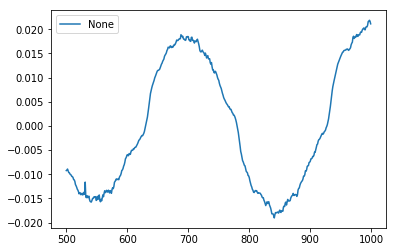

In [12]:
delta_j4 = df.j4 - df.jd4
fig3 = plt.figure(); delta_j4[500:1000].plot(); plt.legend(loc='best')
#delta_j7.head()
df['delta_j4'] = delta_j4

### Plotting delta rad vs effort

<Figure size 432x288 with 0 Axes>

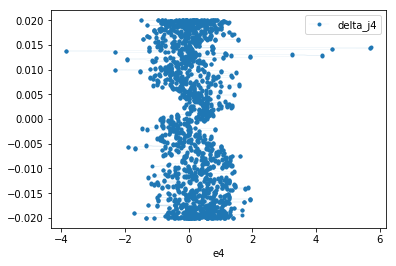

In [38]:
fig4 = plt.figure(); df[0:3000].plot(x = 'e4', y = 'delta_j4', marker='.',lw=0.05); plt.legend(loc='best')

### Prueba de validación para modelo FFNN
#### Solo Neuronas Lineales (model1)
Se utiliza un modelo de 1 input layer de 15 neuronas lineales, 2 hidden layers de 15 neuronas lineales y 1 output layer de 2 neuronas lineales.  

In [30]:
# Generating model
model1 = Sequential()
model1.add(Dense(units=20, activation='linear', input_dim=2))
model1.add(Dense(units=20, activation='linear', use_bias=True))
model1.add(Dropout(0.2))
model1.add(Dense(units=20, activation='linear', use_bias=True))
model1.add(Dropout(0.2))
model1.add(Dense(units=1, activation='linear', use_bias=True))

model1.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q_tmp = df.j2.values.reshape(number_training_data,1)
T_tmp = df.e2.values.reshape(number_training_data,1)
qd_tmp = df.jd2
x_train = np.concatenate([q_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)
#print x_train.shape
#print y_train.shape


#### Feeding data

In [31]:
model1.fit(x_train, y_train, epochs=500, batch_size=50)

Epoch 1/500
1001/1001 [==============================] - 0s 472us/step - loss: 224.9661 - acc: 9.9900e-04
Epoch 2/500
1001/1001 [==============================] - 0s 103us/step - loss: 80.3791 - acc: 9.9900e-04
Epoch 3/500
1001/1001 [==============================] - 0s 97us/step - loss: 37.0657 - acc: 9.9900e-04
Epoch 4/500
1001/1001 [==============================] - 0s 103us/step - loss: 18.8885 - acc: 9.9900e-04
Epoch 5/500
1001/1001 [==============================] - 0s 99us/step - loss: 6.2698 - acc: 9.9900e-04
Epoch 6/500
1001/1001 [==============================] - 0s 89us/step - loss: 2.4832 - acc: 9.9900e-04
Epoch 7/500
1001/1001 [==============================] - 0s 94us/step - loss: 1.2091 - acc: 9.9900e-04
Epoch 8/500
1001/1001 [==============================] - 0s 108us/step - loss: 0.6964 - acc: 9.9900e-04
Epoch 9/500
1001/1001 [==============================] - 0s 81us/step - loss: 0.4093 - acc: 9.9900e-04
Epoch 10/500
1001/1001 [==============================] - 0s 95u

1001/1001 [==============================] - 0s 85us/step - loss: 0.1653 - acc: 9.9900e-04
Epoch 156/500
1001/1001 [==============================] - 0s 93us/step - loss: 0.1653 - acc: 9.9900e-04
Epoch 157/500
1001/1001 [==============================] - 0s 84us/step - loss: 0.1646 - acc: 9.9900e-04
Epoch 158/500
1001/1001 [==============================] - 0s 81us/step - loss: 0.1656 - acc: 9.9900e-04
Epoch 159/500
1001/1001 [==============================] - 0s 75us/step - loss: 0.1650 - acc: 9.9900e-04
Epoch 160/500
1001/1001 [==============================] - 0s 90us/step - loss: 0.1654 - acc: 9.9900e-04
Epoch 161/500
1001/1001 [==============================] - 0s 88us/step - loss: 0.1654 - acc: 9.9900e-04
Epoch 162/500
1001/1001 [==============================] - 0s 100us/step - loss: 0.1661 - acc: 9.9900e-04
Epoch 163/500
1001/1001 [==============================] - 0s 102us/step - loss: 0.1648 - acc: 9.9900e-04
Epoch 164/500
1001/1001 [==============================] - 0s 92us/

1001/1001 [==============================] - 0s 139us/step - loss: 0.1647 - acc: 9.9900e-04
Epoch 309/500
1001/1001 [==============================] - 0s 108us/step - loss: 0.1625 - acc: 9.9900e-04
Epoch 310/500
1001/1001 [==============================] - 0s 100us/step - loss: 0.1611 - acc: 9.9900e-04
Epoch 311/500
1001/1001 [==============================] - 0s 98us/step - loss: 0.1649 - acc: 9.9900e-04
Epoch 312/500
1001/1001 [==============================] - 0s 147us/step - loss: 0.1639 - acc: 9.9900e-04
Epoch 313/500
1001/1001 [==============================] - 0s 114us/step - loss: 0.1642 - acc: 9.9900e-04
Epoch 314/500
1001/1001 [==============================] - 0s 106us/step - loss: 0.1650 - acc: 9.9900e-04
Epoch 315/500
1001/1001 [==============================] - 0s 94us/step - loss: 0.1643 - acc: 9.9900e-04
Epoch 316/500
1001/1001 [==============================] - 0s 94us/step - loss: 0.1645 - acc: 9.9900e-04
Epoch 317/500
1001/1001 [==============================] - 0s 9

1001/1001 [==============================] - 0s 109us/step - loss: 0.1604 - acc: 9.9900e-04
Epoch 464/500
1001/1001 [==============================] - 0s 89us/step - loss: 0.1621 - acc: 0.0000e+00
Epoch 465/500
1001/1001 [==============================] - 0s 88us/step - loss: 0.1626 - acc: 0.0000e+00
Epoch 466/500
1001/1001 [==============================] - 0s 84us/step - loss: 0.1619 - acc: 9.9900e-04
Epoch 467/500
1001/1001 [==============================] - 0s 84us/step - loss: 0.1633 - acc: 9.9900e-04
Epoch 468/500
1001/1001 [==============================] - 0s 88us/step - loss: 0.1637 - acc: 0.0000e+00
Epoch 469/500
1001/1001 [==============================] - 0s 96us/step - loss: 0.1630 - acc: 9.9900e-04
Epoch 470/500
1001/1001 [==============================] - 0s 108us/step - loss: 0.1623 - acc: 0.0000e+00
Epoch 471/500
1001/1001 [==============================] - 0s 89us/step - loss: 0.1624 - acc: 0.0000e+00
Epoch 472/500
1001/1001 [==============================] - 0s 85us/

In [11]:
(number_evaluation_data, _) = df_eval.shape
q_tmp = df_eval.j2.values.reshape(number_evaluation_data,1)
T_tmp = df_eval.e2.values.reshape(number_evaluation_data,1)
qd_tmp = df_eval.jd2
x_eval = np.concatenate([q_tmp, T_tmp], axis =1)
y_eval = qd_tmp.values.reshape(number_evaluation_data,1)

In [12]:
model1.evaluate(x_eval, y_eval, batch_size=50)

5001/5001 [==============================] - 0s 43us/step


[0.09600156076569792, 0.00019996000352894586]

In [32]:
(number_validation_data, _) = df_val.shape
q_tmp = df_val.j2.values.reshape(number_validation_data,1)
T_tmp = df_val.e2.values.reshape(number_validation_data,1)
qd_tmp = df_val.jd2
x_val = np.concatenate([q_tmp, T_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)

In [33]:
y1_pred = model1.predict(x_val)

In [34]:
df_val['y1_pred'] = y1_pred

<Figure size 432x288 with 0 Axes>

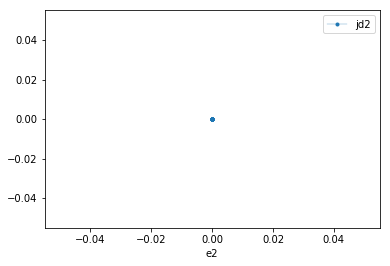

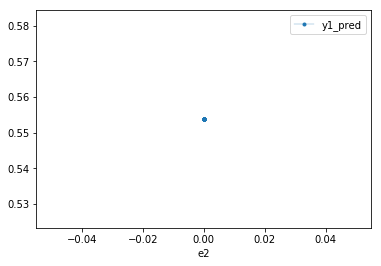

In [36]:
fig5 = plt.figure(); df_val[0:200].plot(x = 'e2', y = 'jd2', marker='.',lw=0.3)
df_val[0:200].plot(x = 'e2', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

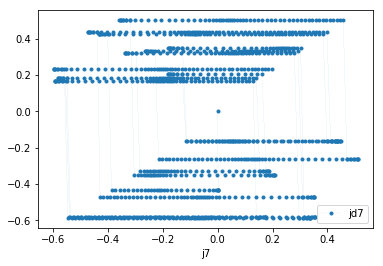

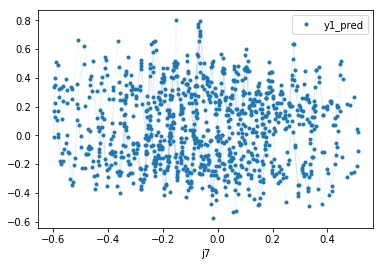

In [31]:
fig6 = plt.figure(); df_val[0:1000].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:1000].plot(x = 'j7', y = 'y1_pred', marker='.',lw=0.05); plt.legend(loc='best')

In [23]:
print x_train.shape
print df_val.shape
print df_eval.shape

(50001, 2)
(20001, 23)
(10001, 22)


### Neuronas  con función de activación sigmoid
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas sigmoides y 1 output layer de 2 neuronas lineales.  

In [18]:
model2 = Sequential()
model2.add(Dense(units=20, activation='linear', input_dim=2))
model2.add(Dense(units=20, activation='sigmoid'))
model2.add(Dense(units=20, activation='sigmoid'))
model2.add(Dense(units=1, activation='linear'))

model2.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


#### Feeding data

In [19]:
model2.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 81us/step - loss: 0.0178 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 76us/step - loss: 2.6640e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 77us/step - loss: 2.0148e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 4s 75us/step - loss: 1.8707e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 4s 74us/step - loss: 1.8417e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.7713e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.7773e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 76us/step - loss: 1.7316e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 4s 76us/step - loss: 1.7059e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [=======

In [20]:
(number_evaluation_data, _) = df_eval.shape
q_tmp = df_eval.j7.values.reshape(number_evaluation_data,1)
T_tmp = df_eval.e7.values.reshape(number_evaluation_data,1)
qd_tmp = df_eval.jd7
x_eval = np.concatenate([q_tmp, T_tmp], axis =1)
y_eval = qd_tmp.values.reshape(number_evaluation_data,1)

In [21]:
model2.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 50us/step


[5.409905237837468e-05, 9.998999876494932e-05]

In [22]:
(number_validation_data, _) = df_val.shape
q_tmp = df_val.j7.values.reshape(number_validation_data,1)
T_tmp = df_val.e7.values.reshape(number_validation_data,1)
qd_tmp = df_val.jd7
x_val = np.concatenate([q_tmp, T_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)

In [23]:
y2_pred = model2.predict(x_val)

In [24]:
df_val['y2_pred'] = y2_pred

KeyError: 'y2_pred'

<Figure size 432x288 with 0 Axes>

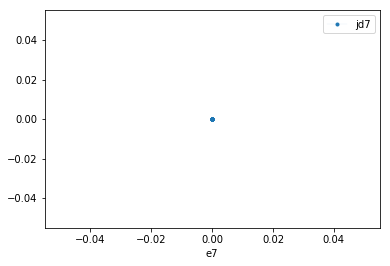

In [31]:
fig7 = plt.figure(); df_val[400:3000].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[400:3000].plot(x = 'e7', y = 'y2_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

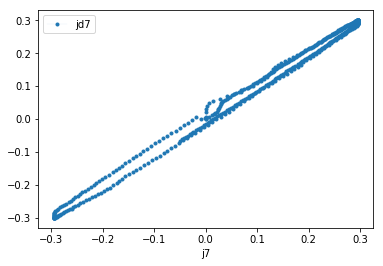

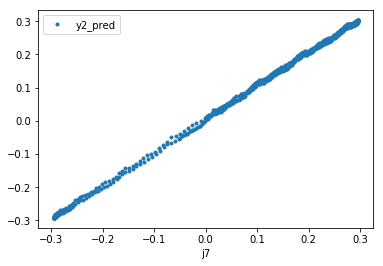

In [27]:
fig8 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y2_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación tanh
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas tanh y 1 output layer de 2 neuronas lineales.  

In [28]:
model3 = Sequential()
model3.add(Dense(units=20, activation='linear', input_dim=2))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=1, activation='linear'))

model3.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q_tmp = df.j7.values.reshape(number_training_data,1)
T_tmp = df.e7.values.reshape(number_training_data,1)
qd_tmp = df.jd7
x_train = np.concatenate([q_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)
#print x_train.shape

In [29]:
model3.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 5s 95us/step - loss: 2.8819e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 88us/step - loss: 1.3268e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 83us/step - loss: 1.3604e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 5s 92us/step - loss: 1.4294e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 5s 93us/step - loss: 1.4052e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 87us/step - loss: 1.4676e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 5s 90us/step - loss: 1.4271e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 88us/step - loss: 1.4547e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 5s 90us/step - loss: 1.4136e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [30]:
model3.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 44us/step


[0.00017780011091296104, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

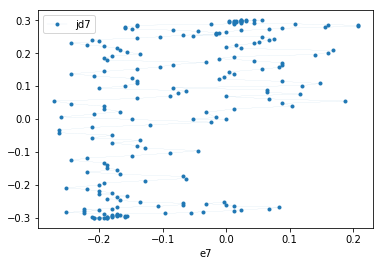

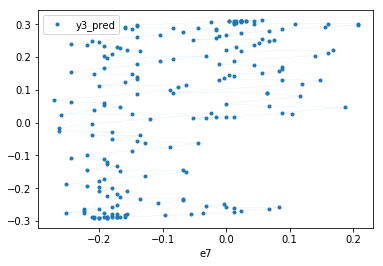

In [31]:
y3_pred = model3.predict(x_val)
df_val['y3_pred'] = y3_pred
fig9 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

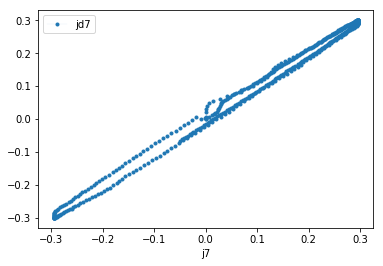

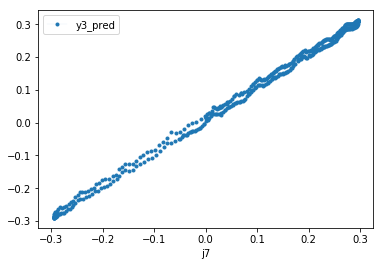

In [35]:
fig10 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación elu (model 4)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas elu y 1 output layer de 2 neuronas lineales.  

In [36]:
model4 = Sequential()
model4.add(Dense(units=20, activation='linear', input_dim=2))
model4.add(Dense(units=20, activation='elu'))
model4.add(Dense(units=20, activation='elu'))
model4.add(Dense(units=1, activation='linear'))

model4.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

In [37]:
model4.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 75us/step - loss: 1.5998e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 3s 69us/step - loss: 1.5754e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.5190e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 3s 66us/step - loss: 1.5352e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.4887e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.4812e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 3s 69us/step - loss: 1.4470e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 3s 70us/step - loss: 1.3959e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 3s 70us/step - loss: 1.4177e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [38]:
model4.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 50us/step


[3.3041127614063134e-05, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

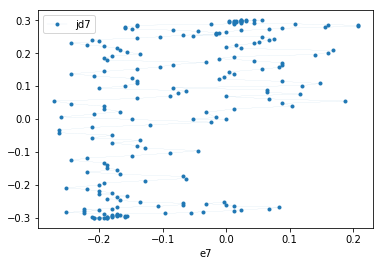

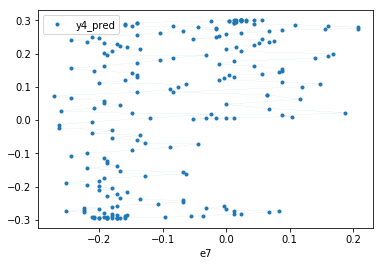

In [39]:
y4_pred = model4.predict(x_val)
df_val['y4_pred'] = y4_pred
fig11 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

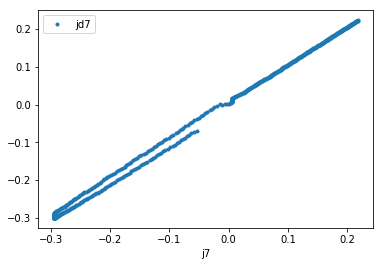

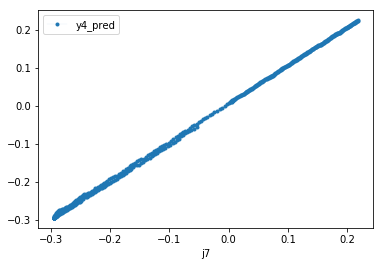

In [43]:
fig12 = plt.figure(); df_val[500:1000].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[500:1000].plot(x = 'j7', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación LeakyReLU (model 5)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas LeakyReLU y 1 output layer de 2 neuronas lineales.  

In [41]:
model5 = Sequential()
model5.add(Dense(units=20, activation='linear', input_dim=2))
model5.add(Dense(units=20, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=20, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=1, activation='linear'))

model5.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [42]:
model5.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 83us/step - loss: 6.9236e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.1412e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 71us/step - loss: 1.0597e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.0698e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.1274e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.0566e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 4s 74us/step - loss: 1.1525e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 71us/step - loss: 1.0558e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.0168e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [44]:
model5.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 1s 53us/step


[3.595215256979881e-05, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

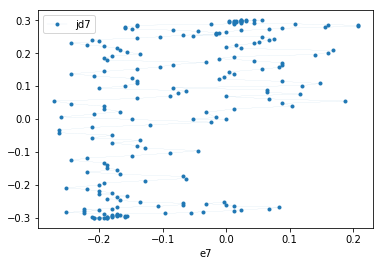

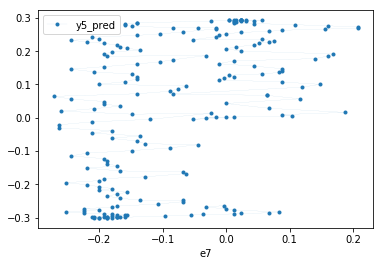

In [45]:
y5_pred = model5.predict(x_val)
df_val['y5_pred'] = y5_pred
fig13 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

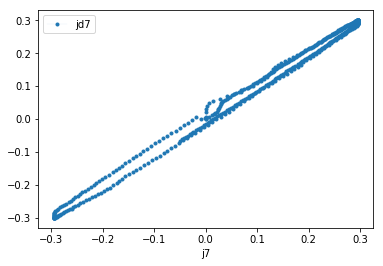

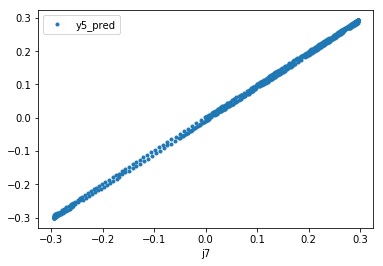

In [47]:
fig14 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

In [28]:
from keras.models import Sequential, Model
import keras

from keras.layers import Dense, Activation, LSTM, Input
inputs = Input(shape=(None, 2))
first_lstm = LSTM(30, return_state=True)
outputs, state_h1, state_c1 = first_lstm(inputs)
# We discard `encoder_outputs` and only keep the states.
#second_lstm = LSTM(30, return_state=True)
#outputs, state_h2, state_c2 = second_lstm(outputs)
dense_layer = Dense(1, activation='linear')
outputs = dense_layer(outputs)

model = Model(inputs, outputs)
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])
#model1.evaluate(x_eval, y_eval, batch_size=50)


In [31]:
x_tmp = x_train.reshape(50001,2,1)
y_tmp = y_train.reshape(50001,2,1)

ValueError: cannot reshape array of size 50001 into shape (50001,2,1)

In [27]:
model.fit(x_train.reshape(50001,2,1), y_train.reshape(50001,2,1), epochs=10, batch_size=50)

ValueError: cannot reshape array of size 50001 into shape (50001,2,1)

In [26]:
x_train.reshape(50001,2,1)

array([[[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[-2.10351562e-03],
        [ 0.00000000e+00]],

       [[-2.10351562e-03],
        [ 5.20000000e-02]],

       ...,

       [[ 1.46682617e-01],
        [-1.70000000e+00]],

       [[ 1.42559570e-01],
        [-2.28400000e+00]],

       [[ 1.38745117e-01],
        [-1.32800000e+00]]])